# 多和弦图(Multi-Chord Diagram)

                                         Event  e2_count outer_ID
0           Speed Skating Women's 1,000 metres        36        1
1           Speed Skating Women's 1,500 metres        36        2
4             Speed Skating Women's 500 metres        35        3
5  Speed Skating Women's Team Pursuit (6 laps)        30        4
2           Speed Skating Women's 3,000 metres        28        5
3           Speed Skating Women's 5,000 metres        16        6


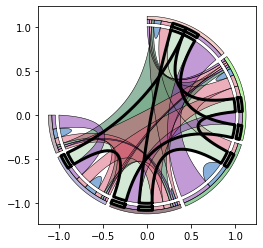

In [1]:
from dataoutsider import multi_chord as mc

df = mc.load_olympics_df()
df = df.loc[(df['Year'] >= 2014) & (df['Sex'] == 'F') & (df['Sport'] == 'Speed Skating')]
outer = 'Event'
inner = 'ID'
lookup = mc.multi_chord_get_alias(df, outer, inner)
print(lookup)
df_mc = mc.multi_chord_alias(df, outer, inner, percent = 75.)

df_mc_venn = mc.multi_chord_venn(df_mc)

mc.multi_chord_plot(df_mc, level = 4, transparency = 0.5)

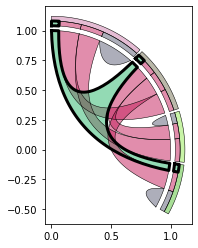

In [2]:
from dataoutsider import multi_chord as mc
import pandas as pd

data = [['a', 25.5], ['a,b', 15], ['a,c', 14.4], ['a,c,d', 5], ['c,d', 13], ['d', 14], ['c,b', 10], ['b', 7]]
df = pd.DataFrame(data, columns = ['group', 'value'])
df_mc = mc.multi_chord_on_groups_alias(df, percent=33.)
df_mc_venn = mc.multi_chord_venn(df_mc)
mc.multi_chord_plot(df_mc, level = 3, transparency = 0.5)

  outer  e2_count outer_ID
1     b         3        1
2     c         2        2
3     d         2        3
0     a         1        4


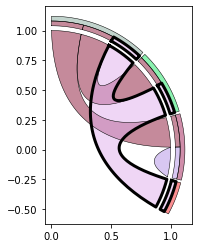

In [4]:
from dataoutsider import multi_chord as mc
import pandas as pd

data = [['5', 'a'], ['5', 'b'], ['5', 'd'], ['2', 'b'], ['2', 'c'], ['3', 'b'], ['3', 'd'], ['4', 'c']]
df = pd.DataFrame(data, columns = ['inner', 'outer'])
lookup = mc.multi_chord_get_alias(df, 'outer', 'inner')
print(lookup) # use outer_ID (alias) to set manual order
df_mc = mc.multi_chord_alias(df, outer='outer', inner='inner', order='1,3,2,4', percent=33.) #, order = 'b,c,d,a'
mc.multi_chord_plot(df_mc, level = 3, transparency = 0.5)

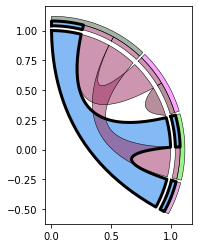

In [13]:
from dataoutsider import multi_chord as mc
import pandas as pd

data = [['a,b,d', 1], ['b,c', 1], ['b,d', 1], ['c', 1]]
df = pd.DataFrame(data, columns = ['group', 'value'])
df_mc = mc.multi_chord_on_groups_alias(df, order = 'b,c,d,a', percent=33.)
mc.multi_chord_plot(df_mc, level = 3, transparency = 0.5)

multi_chord_alias：多和弦图生成器，使用别名对提供的组进行编码;

multi_chord_get_alias：检索提供的组的别名(可用于创建手动排序);

multi_chord_on_groups_alias：基于预定义分组的多和弦图生成器;

multi_chord_venn：用于创建 Upset 图的输出;

multi_chord_plot：使用Matplotlib生成绘图。